In [34]:
!pip install Pillow
!pip install pytesseract
!pip install pdf2image
!sudo apt-get install tesseract-ocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.


In [35]:
# Requires Python 3.6 or higher due to f-strings

# Import libraries
import platform
from tempfile import TemporaryDirectory
from pathlib import Path

import pytesseract
from pdf2image import convert_from_path
from PIL import Image


In [36]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.86.1-0ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.


In [37]:
# use this command to install open cv2
# pip install opencv-python

import cv2

def mark_region(image_path):
    
    image = cv2.imread(image_path)

    # define threshold of regions to ignore
    THRESHOLD_REGION_IGNORE = 40

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (9,9), 0)
    thresh = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV,11,30)

    # Dilate to combine adjacent text contours
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
    dilate = cv2.dilate(thresh, kernel, iterations=4)

    # Find contours, highlight text areas, and extract ROIs
    cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    line_items_coordinates = []
    for c in cnts:
        area = cv2.contourArea(c)
        x, y, w, h = cv2.boundingRect(c)
        
        if w < THRESHOLD_REGION_IGNORE or h < THRESHOLD_REGION_IGNORE:
            continue
        
        image = cv2.rectangle(image, (x,y), (x+w, y+h), color=(255,0,255), thickness=3)
        line_items_coordinates.append([(x,y), (x+w, y+h)])

    return image, line_items_coordinates

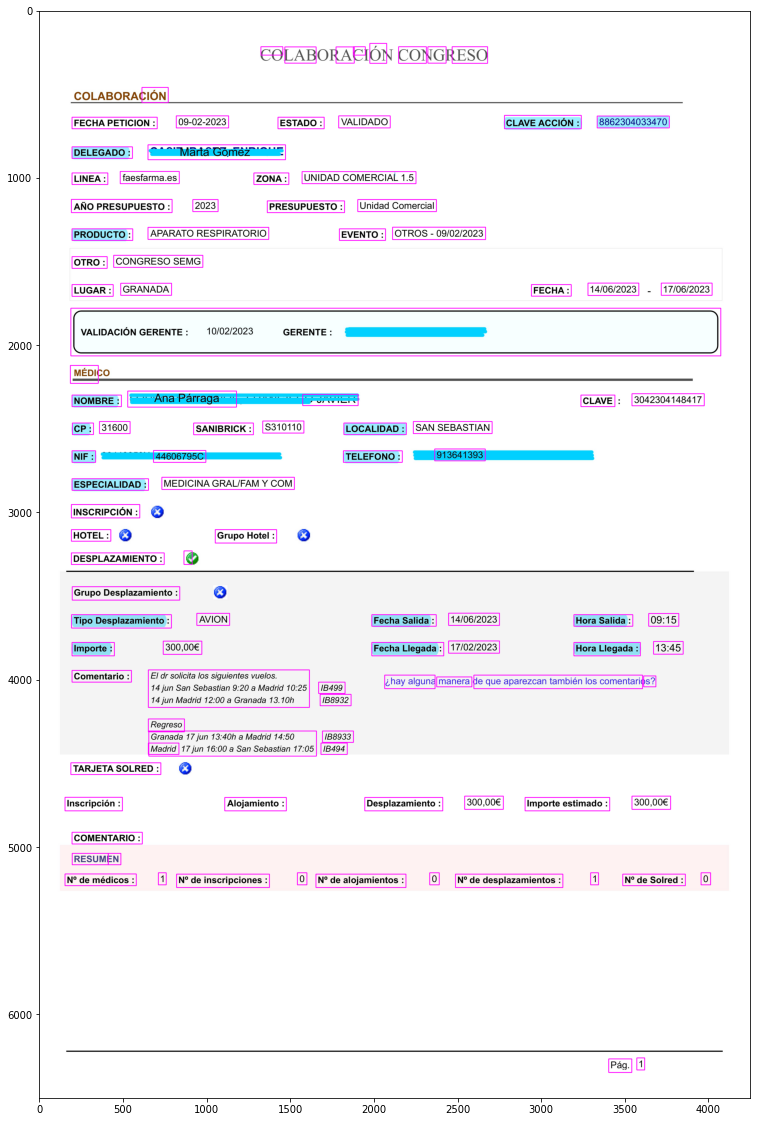

In [38]:
# use this command to install open cv2
# pip install opencv-python

# use this command to install matplotlib
# pip install matplotlib

import cv2
import matplotlib.pyplot as plt

# [... define the mark_region method ...]

FILENAME = "/content/page_001.jpg"
image, line_items_coordinates = mark_region(FILENAME)
plt.figure(figsize=(20,20))
plt.imshow(image)

In [39]:

if platform.system() == "Windows":
	# We may need to do some additional downloading and setup...
	# Windows needs a PyTesseract Download
	# https://github.com/UB-Mannheim/tesseract/wiki/Downloading-Tesseract-OCR-Engine

	pytesseract.pytesseract.tesseract_cmd = (
		r"D:\1400 WORK\WORK AI\POONISHA\PROJECTS\TEXT_EXTRACT\tesseract.exe"

	)

	# Windows also needs poppler_exe
	path_to_poppler_exe = Path(r"D:\.....")
	
	# Put our output files in a sane place...
	out_directory = Path(r"/content").expanduser()
else:
	out_directory = Path("/content").expanduser()	

# Path of the Input pdf
PDF_file = Path(r"/content/d.pdf")

# Store all the pages of the PDF in a variable
image_file_list = []

text_file = out_directory / Path("out_text.txt")

def main():
	''' Main execution point of the program'''
	with TemporaryDirectory() as tempdir:
		# Create a temporary directory to hold our temporary images.

		"""
		Part #1 : Converting PDF to images
		"""

		if platform.system() == "Windows":
			pdf_pages = convert_from_path(
				PDF_file, 500, poppler_path=path_to_poppler_exe
			)
		else:
			pdf_pages = convert_from_path(PDF_file, 500)
		# Read in the PDF file at 500 DPI

		# Iterate through all the pages stored above
		for page_enumeration, page in enumerate(pdf_pages, start=1):
			# enumerate() "counts" the pages for us.

			# Create a file name to store the image
			filename = f"page_{page_enumeration:03}.jpg"

			# Declaring filename for each page of PDF as JPG
			# For each page, filename will be:
			# PDF page 1 -> page_001.jpg
			# PDF page 2 -> page_002.jpg
			# PDF page 3 -> page_003.jpg
			# ....
			# PDF page n -> page_00n.jpg

			# Save the image of the page in system
			page.save(filename, "JPEG")
			image_file_list.append(filename)

		"""
		Part #2 - Recognizing text from the images using OCR
		"""

		with open(text_file, "a") as output_file:
			# Open the file in append mode so that
			# All contents of all images are added to the same file

			# Iterate from 1 to total number of pages
			for image_file in image_file_list:

				# Set filename to recognize text from
				# Again, these files will be:
				# page_1.jpg
				# page_2.jpg
				# ....
				# page_n.jpg

				# Recognize the text as string in image using pytesserct
				text = str(((pytesseract.image_to_string(Image.open(image_file)))))

				# The recognized text is stored in variable text
				# Any string processing may be applied on text
				# Here, basic formatting has been done:
				# In many PDFs, at line ending, if a word can't
				# be written fully, a 'hyphen' is added.
				# The rest of the word is written in the next line
				# Eg: This is a sample text this word here GeeksF-
				# orGeeks is half on first line, remaining on next.
				# To remove this, we replace every '-\n' to ''.
				text = text.replace("-\n", "")

				# Finally, write the processed text to the file.
				output_file.write(text)

			# At the end of the with .. output_file block
			# the file is closed after writing all the text.
		# At the end of the with .. tempdir block, the
		# TemporaryDirectory() we're using gets removed!	
	# End of main function!
	
if __name__ == "__main__":
	# We only want to run this if it's directly executed!
	main()


In [40]:
f = open('/content/out_text.txt', 'r')

file_contents = f.read()

print (file_contents)

COLABORACION CONGRESO

COLABORACION

FECHA PETICION : 09-02-2023 ESTADO:  VALIDADO CLAVE ACCION: 8862304033470

DELEGADO: << ~— Marta Gomez 7 =

LINEA: _ faesfarma.es ZONA: UNIDAD COMERCIAL 1.5
ANO PRESUPUESTO : 2023 PRESUPUESTO : Unidad Comercial
PRODUCTO : APARATO RESPIRATORIO EVENTO: OTROS - 09/02/2023

OTRO: CONGRESO SEMG

LUGAR: GRANADA FECHA: 14/06/2023 - 17/06/2023

VALIDACION GERENTE : 10/02/2023 GERENTE: ©

 

 

 

MEDICO

NOMBRE : CLAVE : 3042304148417
CP: 31600 SANIBRICK: $310110 LOCALIDAD: SAN SEBASTIAN

NIF: 9900700 44606795C TELEFONO: (9136413930

ESPECIALIDAD : MEDICINA GRAL/FAM Y COM

INSCRIPCION: &3

 

 

HOTEL: @9 GrupoHotel: 3
DESPLAZAMIENTO : @
Grupo Desplazamiento : ay
Tipo Desplazamiento : AVION Fecha Salida: 14/06/2023 Hora Salida: 09:15
Importe : 300,00€ Fecha Llegada : 17/02/2023 Hora Llegada : 13:45
poe a a soletaies SiqUlcni¢s VHEIOS. éhay alguna manera de que aparezcan también los comentarios?

14 jun San Sebastian 9:20 a Madrid 10:25 1IB499

14 jun Madrid